In [1]:
import os
os.chdir('/pi/zhiping.weng-umw/data/ramirezc/splice-benchmark')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pickle_serialize import save
from pickle_serialize import load
from gene_centric_gencode_evaluator import GencodeSpliceSiteEvaluator

In [3]:
# Initialize evaluator
evaluator = GencodeSpliceSiteEvaluator(
    gencode_gtf="/data/Splice/data/gencode.v47.basic.annotation.gtf",
    fasta_file="/data/genomes/hg38/hg38.fa"
)

In [4]:
# Generate ground truth from GENCODE
acceptor_truth, donor_truth = evaluator.parse_gencode()

# save(acceptor_truth, "acceptor_truth")
# save(donor_truth, "donor_truth")

# # Load ground truth
# acceptor_truth = load("acceptor_truth")
# donor_truth = load("donor_truth")

In [5]:
# Generate predictions using SegmentNT model
acceptor_pred, donor_pred = evaluator.generate_segmentnt_predictions(acceptor_truth)

save(acceptor_pred, "segmentnt_acceptor_pred")
save(donor_pred, "segmentnt_donor_pred")

Loading SegmentNT model...
Downloaded model's hyperparameters.
Downloaded model's weights...


Processing chromosomes:   0%|          | 0/2 [00:00<?, ?it/s]

64444167
64444167


  0%|          | 0/1289 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[1,1024,8192]), ShapedArray(float32[1,4096,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,8192]), ShapedArray(float32[1,4096,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), ShapedArray(float32[1,1024,1024]), ShapedArray(float32[1,1024]), Sha

46709983
46709983


  0%|          | 0/934 [00:00<?, ?it/s]

In [6]:
# Trim predictions to only include positions within genes
acceptor_pred = load('segmentnt_acceptor_pred')
donor_pred = load('segmentnt_donor_pred')

trimmed_acceptor, trimmed_donor = evaluator.trim_predictions(acceptor_pred, donor_pred)

In [7]:
# Get metrics including top-k accuracy
acc_precision, acc_recall, acc_auprc, acc_topk = evaluator.calculate_metrics(
    acceptor_truth, trimmed_acceptor
)
don_precision, don_recall, don_auprc, don_topk = evaluator.calculate_metrics(
    donor_truth, trimmed_donor  
)

/tmp/ipykernel_2284334/2584306947.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("auprc_topk_spliceai.png", dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


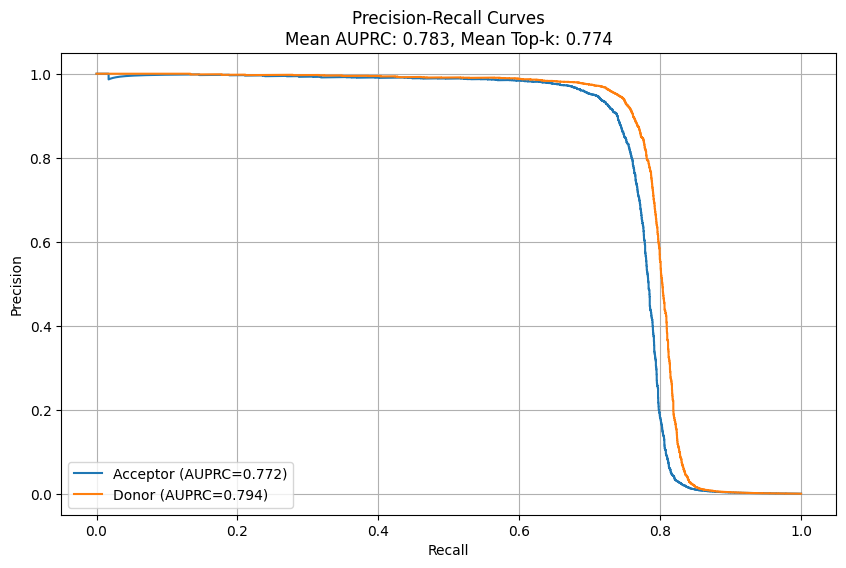

Acceptor AUPRC: 0.7715, Top-k: 0.7636
Donor AUPRC: 0.7943, Top-k: 0.7842
Mean AUPRC: 0.7829, Mean Top-k: 0.7739


In [8]:
# Calculate mean metrics
mean_auprc = (acc_auprc + don_auprc) / 2
mean_topk = (acc_topk + don_topk) / 2

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(acc_recall, acc_precision, label=f'Acceptor (AUPRC={acc_auprc:.3f})')
plt.plot(don_recall, don_precision, label=f'Donor (AUPRC={don_auprc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curves\nMean AUPRC: {mean_auprc:.3f}, Mean Top-k: {mean_topk:.3f}')
plt.legend()
plt.grid(True)
plt.savefig("auprc_topk_spliceai.png", dpi=300)
plt.show()

# Print results
print(f"Acceptor AUPRC: {acc_auprc:.4f}, Top-k: {acc_topk:.4f}")
print(f"Donor AUPRC: {don_auprc:.4f}, Top-k: {don_topk:.4f}")
print(f"Mean AUPRC: {mean_auprc:.4f}, Mean Top-k: {mean_topk:.4f}")

In [9]:
# !jupyter nbconvert --to python splice-benchmark/evaluate_segmentnt_gene_centric_gencode.ipynb

In [10]:
for chrom in acceptor_truth.keys():
   truth_sites = np.where(acceptor_truth[chrom] == 1)[0][:200]
   pred_sites = np.where(trimmed_acceptor[chrom] > 0.9)[0][:200]
   
   print(f"\n{chrom}")
   print("Truth sites:", truth_sites)
   print("Predicted sites (>0.9):", pred_sites)


chr20
Truth sites: [  87671   96004  142589  145414  157453  158773  227257  229277  257723
  259076  297569  325551  346882  347023  347110  347116  347433  349235
  349248  349615  349637  353209  380759  380814  387987  388010  391286
  396197  408170  408298  408304  408342  409829  409880  410411  417525
  417731  419346  419557  420870  422126  427312  428490  428950  430349
  833714  844707 1118601 1125497 1127425 1135120 1163129 1164317 1165028
 1203453 1206868 1226043 1226055 1228421 1229879 1231525 1234084 1238043
 1239311 1240320 1242618 1243096 1244045 1246212 1248625 1254268 1266279
 1266293 1266315 1266653 1294950 1295775 1296324 1297045 1297144 1300561
 1304877 1894507 1895406 1895438 1915098 1921394 1922312 1924763 1927874
 1934714 1937319 2101826 2102767 2116665 2143783 2207327 2257953 2296000
 2309656 2310177 2311010 2312897 2317067 2317349 2325848 2328119 2332001
 2335115 2339853 2340433 2380900 2380907 2394451 2395193 2396505 2397917
 2399560 2400305 2403396 240358